In [32]:
import numpy as np # All the libraries I need.
import csv
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pylab as plt
import IPython
import random
from collections import OrderedDict
from sklearn.neural_network import MLPClassifier

class MatchManager:
    
    def __init__(self):
        
        self.header = OrderedDict()
        self.matches_to_examine = []
        
        self.home_wins = []
        self.away_wins = []
        self.draws = []
    
    def gen_index_map(self, path):
        """Populates an OrderedDict representing the header. Key is the column name value is the index. """
        with open(path, 'r', encoding='utf-8') as csv_file: # Good practice to specify the encoding.
            match_reader = csv.reader(csv_file)

            header = next(match_reader)

        # Generate the heading index map.
        self.header = OrderedDict({heading: index for index, heading in enumerate(header)})
        
    def extract_csv(self, path):
        """Reads a CSV file and adds match instances to the corresponding lists."""
        with open(path, 'r', encoding='utf-8') as csv_file:
            
            temp_dict = OrderedDict()
            
            match_reader = csv.reader(csv_file)
            
            header = next(match_reader)
            
            counter = 0
            
            for row in match_reader:
                flag = False

                # Put the record in the relevant list.
                home_goals = int(row[self.header['home_team_goal_count']])
                away_goals = int(row[self.header['away_team_goal_count']])    
                
                if home_goals > away_goals:
                    self.home_wins.append(row + [0])
                elif home_goals < away_goals:
                    self.away_wins.append(row + [1])
                else:
                    self.draws.append(row + [2]) # Represents the classes   
                    
        self.set_combined_classes()
                    
    def set_combined_classes(self):
        # Shuffle the lists
        random.shuffle(self.home_wins)
        random.shuffle(self.away_wins)
        random.shuffle(self.draws)
        
        # Get the minimum of the three lists
        amount = min(len(self.home_wins), len(self.away_wins), len(self.draws))
        
        # Set the mathes to examine list
        self.matches_to_examine = self.home_wins[:amount] + self.away_wins[:amount] + self.draws[:amount]
        
    def extract_relevant_data(self, features):
        """Extract the specified features from the data."""
        relevant_data = []
        print(relevant_data)
        for row in self.matches_to_examine:
            match = []
            for feature in features:
                match.append(row[self.header[feature]])
                

            # Remembering to add the result.
            match.append(row[-1])
                
            relevant_data.append(match)   
        
        
        print(len(relevant_data[0]))
        
        return relevant_data
    
        
                
mm = MatchManager()
mm.gen_index_map('data_2/data.csv')
mm.extract_csv('data_2/data.csv')

# We have about 71 samples per class.
print(len(mm.matches_to_examine))

213


In [33]:
# Now we need to convert the data into data that the machine learning model can make use of.
y_results = []
X_matches = []

features = ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_team_corner_count',
           'away_team_corner_count', 'home_team_yellow_cards', 'home_team_red_cards', 'away_team_yellow_cards', 
           'away_team_red_cards', 'home_team_first_half_cards', 'home_team_second_half_cards', 
            'away_team_first_half_cards', 'away_team_second_half_cards', 'home_team_shots', 'away_team_shots',
           'home_team_shots_on_target', 'away_team_shots_on_target', 'home_team_shots_off_target', 
           'home_team_fouls', 'away_team_fouls', 'home_team_possession',
           'away_team_possession', 'btts_percentage_pre_match']

relevant_features = mm.extract_relevant_data(features)

X_matches = [row[:-1] for row in relevant_features]
y_results = [row[-1] for row in relevant_features]  


[]
23


In [34]:
# Now we need to convert the data into a numpy array
X_matches = np.array(X_matches, dtype='float')
y_matches = np.array(y_results, dtype='float')

print(X_matches.shape)

# Trans form the y
y_matches = np.reshape(y_matches, (-1, 1))
print(y_matches.shape)

(213, 22)
(213, 1)


In [35]:
"""
# I am going to reshape the x results
X_copy = np.array(X_matches, copy=True)


for index, column in enumerate(X_copy.T):
    # Need to create new columns by multiplying columns together.
    for mul_index in range(min(index+1, X_copy.shape[1] - 2), X_copy.shape[1] - 1):
        new_col = np.multiply(X_copy[:, index], X_copy[:, mul_index])
        new_col = np.reshape(new_col, (-1,1))
        X_matches = np.append(X_matches, new_col, axis=1)
        
"""

print(X_matches.shape)

(213, 22)


In [36]:
# Now we can carry out the model fitting.
X_train, X_test, y_train, y_test = train_test_split(X_matches, y_results, random_state=20)

logistic = LogisticRegression(max_iter=10000, C=10, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [43]:
print("Training set score: {:.3f}".format(logistic.score(X_train, y_train)))

Training set score: 0.692


In [44]:
print("Testing set score: {:.3f}".format(logistic.score(X_test, y_test)))

Testing set score: 0.426


Accuracy on train: 0.7735849056603774
Accuracy on test: 0.4444444444444444


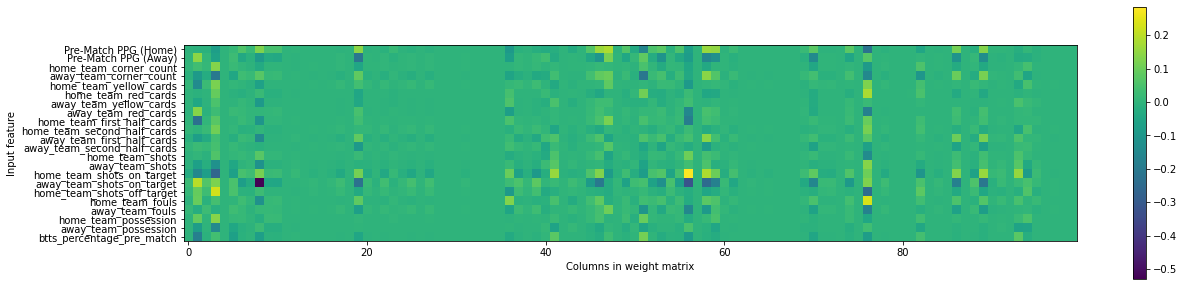

In [119]:
# Attempt to apply a neural net.
# Get the mean of each feature.
# Get the variance of each feature.
X_train_mean = X_train.std(axis=0)

X_train_sig = X_train.std(axis=0)


X_train_std = X_train.std(axis=0)


X_train_norm = (X_train - X_train_mean) / X_train_sig
X_test_norm = (X_test - X_train_mean) / X_train_sig

# Train the neural net.
mlp = MLPClassifier(max_iter=10000, solver='lbfgs', alpha=10)
mlp.fit(X_train_norm, y_train)

print("Accuracy on train: " + str(mlp.score(X_train_norm, y_train)))
print("Accuracy on test: " + str(mlp.score(X_test_norm, y_test)))

plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(features)), features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

22


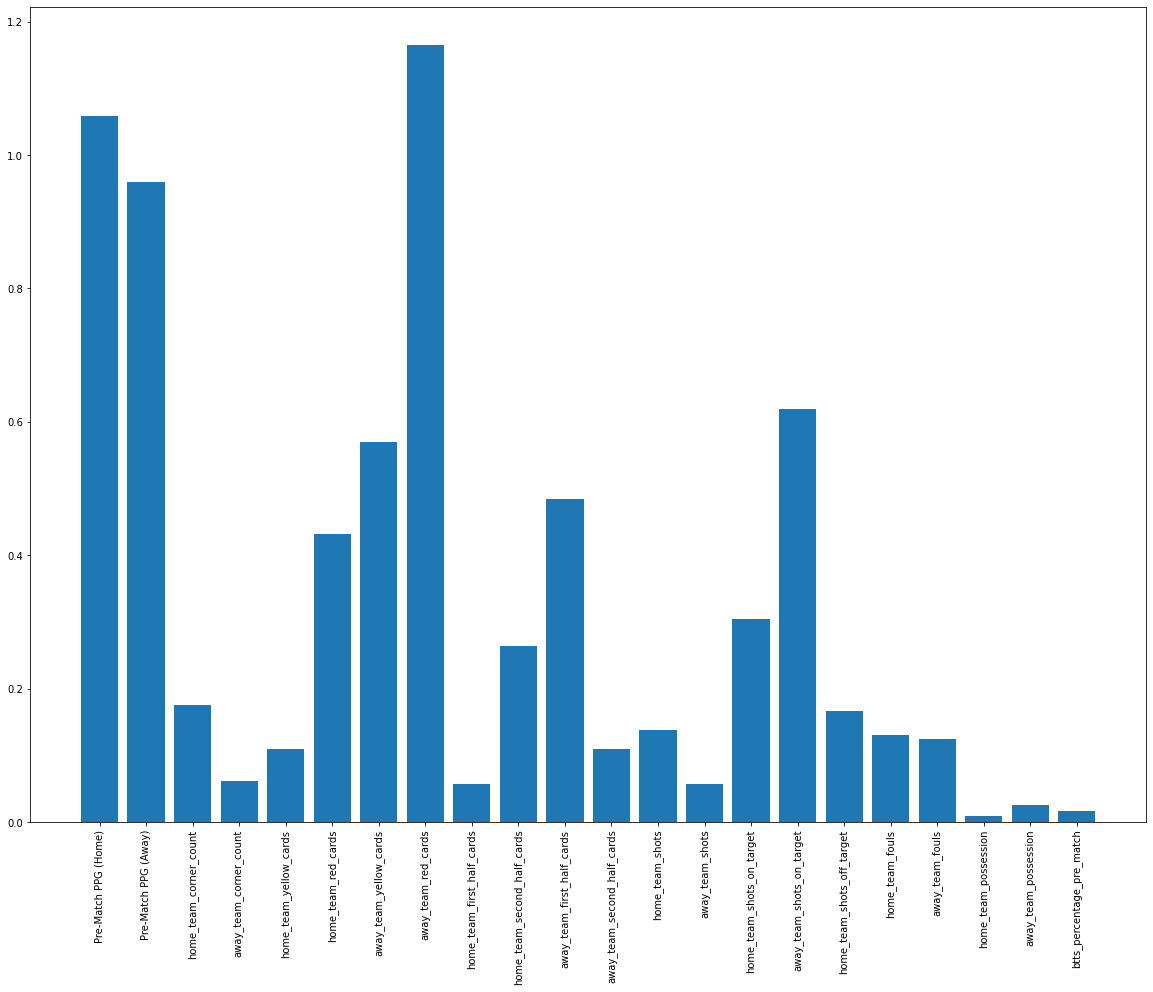

In [244]:
# Plot the importance of each feature.
importance = logistic.coef_[0]

print(len(features))

fig,ax = plt.subplots(figsize=(20,15))
plt.bar(features, abs(importance[:23]))
plt.xticks(rotation=90)

plt.show(mm.matches_to_examine)

In [201]:
def make_prediction(stats):
    np_stats = np.array(stats, dtype=np.float)
    
    np_stats = np.reshape(np_stats, (-1, 1)).T
    
    np_stats_copy = np.array(np_stats, copy=True)
    
    # Multiplying columns of X together.
    # Iterate over the columns
    for index, column in enumerate(np_stats_copy.T):
        # Need to create new columns by multiplying two columns together.

        for mul_index in range(index, np_stats_copy.shape[1]):
            new_col = np.multiply(np_stats_copy[:, index], np_stats_copy[:, mul_index])
            new_col = np.reshape(new_col, (-1,1))
            np_stats = np.append(np_stats, new_col, axis=1)
            

    print(log_reg.predict(np_stats))

    print(logistic.predict_proba(np_stats))
    
make_prediction()
    
    
